# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# sklearn for utilization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, fbeta_score
from sklearn.model_selection import StratifiedKFold

# visualization purpose
import matplotlib.pyplot as plt

# utils
import pickle

# Defining Global Variables 

In [2]:
kfold = StratifiedKFold(n_splits=5, random_state=45, shuffle=True)

# Defining Global Functions

In [3]:
def create_new_input_features(ensemble_classifiers, X, y):
    all_predicted_results = dict()
    list_of_majority_voting_each_models = list()
    list_of_models = list()

    for model_name, models in ensemble_classifiers.items():
        print("\t\t\t", model_name.upper())

        # voting scenario for new data input prepration for ANN model
        if len(models)!=0:
            all_predicted_results[model_name] = dict()
            for sub_model_name, dict_models in models.items():
                all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X)

            # make dataframe for 5 model prediction results on X and get the mode label for that 5 prediction
            model_df_voting = pd.DataFrame(all_predicted_results[model_name]).mode(axis=1)[0]
            list_of_models.append('majority_vote_from_'+model_name)
            list_of_majority_voting_each_models.append(model_df_voting)
            
    new_input_features = pd.concat(list_of_majority_voting_each_models, axis=1)
    new_input_features.columns = list_of_models
    new_input_features['ground_truth'] = y.copy()
            
    return new_input_features

In [4]:
def create_new_input_features_scenario_3(ensemble_classifiers, X, y):
    all_predicted_results = dict()
    list_of_majority_voting_each_models = list()

    for model_name, models in ensemble_classifiers.items():
        print("\t\t\t", model_name.upper())

        if len(models)!=0:
            all_predicted_results[model_name] = dict()
            all_sub_model_name = list()
            for sub_model_name, dict_models in models.items():
                all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X)
                all_sub_model_name.append(sub_model_name)

            # make dataframe for 5 model prediction results without vote mechanism
            df_results_for_each_classifiers = pd.DataFrame(all_predicted_results[model_name])
            df_results_for_each_classifiers.columns = [model_name+"_"+sub_model_name for sub_model_name in all_sub_model_name]
            list_of_majority_voting_each_models.append(df_results_for_each_classifiers)
            
    new_input_features = pd.concat(list_of_majority_voting_each_models, axis=1)
    new_input_features['ground_truth'] = y.copy()
            
    return new_input_features

In [5]:
def print_model_experiment_results(name_of_scenario, y_test, y_pred):
    print('\t\t' + '='*30)
    print('\t\tHASIl UJI COBA {}'.format(name_of_scenario.upper()))
    print('\t\t' + '='*30)
    print("\tAkurasi Score: ", accuracy_score(y_test, y_pred))
    print("\tMacro Recall Score: ", recall_score(y_test, y_pred, average='macro'))
    print("\tMacro Precision Score: ", precision_score(y_test, y_pred, average='macro'))
    print("\tMacro F1-score Score: ", fbeta_score(y_test, y_pred, beta=1, average='macro'))
    print("\tMacro F2-score Score: ", fbeta_score(y_test, y_pred, beta=2, average='macro'))
    print("\tMacro F0.5-score Score: ", fbeta_score(y_test, y_pred, beta=0.5, average='macro'))
    
    print()
    print()
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(14,8))
    disp.plot()
    plt.show()

# Load All pre-trained ensemble stacking model
***
Loading semua model ensemble stacking yang sudah dilatih dari notebook-notebook sebelumnya

In [6]:
# load pre-trained ensemble model from experiment 1
model_ensemble_experiment_1 = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_1.pkl', 'rb'))

# load pre-trained ensemble model from experiment kf
model_ensemble_experiment_kf = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_kf.pkl', 'rb'))

# load pre-trained ensemble model from experiment fs
model_ensemble_experiment_fs = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_fs.pkl', 'rb'))

# load pre-trained ensemble model from experiment ann
model_ensemble_experiment_ann = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_ann.pkl', 'rb'))


# Testing Model using all pre-defined scenario
***
- Scenario 1: sesuai alur pada paper rujukan
- Scenario 2: feature selection dari fitur-fitur pada dataset daun singkong LBP

## Uji Coba Scenario 1

### Load Data for Scenario 1 from model_ensemble_experiment_1.pkl

In [7]:
X_train_scenario_1 = model_ensemble_experiment_1['data']['training']['X']
y_train_scenario_1 = model_ensemble_experiment_1['data']['training']['y']
X_test_scenario_1 = model_ensemble_experiment_1['data']['testing']['X']
y_test_scenario_1 = model_ensemble_experiment_1['data']['testing']['y']

### Create new input features from stacking ensemble ML before ANN process

In [8]:
new_input_testing_features = create_new_input_features(
    model_ensemble_experiment_1['stacking_ensembles'], 
    X_test_scenario_1,
    y_test_scenario_1
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA 1
	Akurasi Score:  0.5708722741433022
	Macro Recall Score:  0.29895175567086946
	Macro Precision Score:  0.321729244612172
	Macro F1-score Score:  0.305324678460915
	Macro F2-score Score:  0.30058081510722334
	Macro F0.5-score Score:  0.313584451902021


              precision    recall  f1-score   support

           0       0.13      0.12      0.13       326
           1       0.23      0.21      0.22       657
           2       0.22      0.15      0.18       716
           3       0.71      0.82      0.76      3948
           4       0.32      0.20      0.24       773

    accuracy                           0.57      6420
   macro avg       0.32      0.30      0.31      6420
weighted avg       0.53      0.57      0.54      6420



<Figure size 1008x576 with 0 Axes>

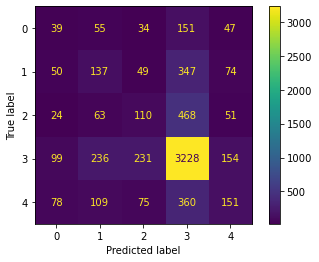

In [9]:
# split X and y from new_input_features before feeding to ANN
new_X_test, new_y_test = new_input_testing_features.drop(['ground_truth'],axis=1), new_input_testing_features['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_1 = model_ensemble_experiment_1['ann'].predict(new_X_test)

# print testing results
print_model_experiment_results('Skenario Uji Coba 1', new_y_test, predicted_ann_testing_scenario_1)

## Uji Coba Scenario kf

### parameter tuning kfold

#### Load Data for Scenario kf

In [10]:
X_train_kf = model_ensemble_experiment_kf['data']['training']['X']
y_train_kf = model_ensemble_experiment_kf['data']['training']['y']
X_test_kf = model_ensemble_experiment_kf['data']['testing']['X']
y_test_kf = model_ensemble_experiment_kf['data']['testing']['y']

#### Create new input feature from stacking ensemble ML before ANN process

In [12]:
new_input_testing_features_kf = create_new_input_features(
    model_ensemble_experiment_kf['stacking_ensembles'], 
    X_test_kf,
    y_test_kf
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


#### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA KF
	Akurasi Score:  0.5735202492211838
	Macro Recall Score:  0.30250359608961247
	Macro Precision Score:  0.3288512379892473
	Macro F1-score Score:  0.30968980838779203
	Macro F2-score Score:  0.30431266594227935
	Macro F0.5-score Score:  0.3192386885478219


              precision    recall  f1-score   support

           0       0.15      0.15      0.15       326
           1       0.23      0.18      0.20       657
           2       0.21      0.16      0.18       716
           3       0.71      0.82      0.76      3948
           4       0.35      0.20      0.26       773

    accuracy                           0.57      6420
   macro avg       0.33      0.30      0.31      6420
weighted avg       0.53      0.57      0.55      6420



<Figure size 1008x576 with 0 Axes>

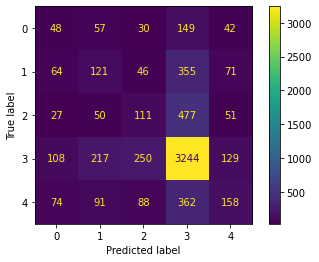

In [13]:
# split X and y from new_input_features before feeding to ANN
new_X_test_kf, new_y_test_kf = new_input_testing_features_kf.drop(['ground_truth'],axis=1), new_input_testing_features_kf['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_kf = model_ensemble_experiment_kf['ann'].predict(new_X_test_kf)

# print testing results
print_model_experiment_results('Skenario Uji Coba kf', new_y_test_kf, predicted_ann_testing_scenario_kf)

### FS Feature Reduction

#### Load Data for Scenario fs

In [14]:
X_train_fs = model_ensemble_experiment_fs['data']['training']['X']
y_train_fs = model_ensemble_experiment_fs['data']['training']['y']
X_test_fs = model_ensemble_experiment_fs['data']['testing']['X']
y_test_fs = model_ensemble_experiment_fs['data']['testing']['y']

#### Create new input feature from stacking ensemble ML before ANN process

In [15]:
new_input_testing_features_fs = create_new_input_features(
    model_ensemble_experiment_fs['stacking_ensembles'], 
    X_test_fs,
    y_test_fs
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


#### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA 2 - USING PCA
	Akurasi Score:  0.5679127725856697
	Macro Recall Score:  0.2994030330736698
	Macro Precision Score:  0.3257656693087411
	Macro F1-score Score:  0.30662515000361884
	Macro F2-score Score:  0.3012484673755892
	Macro F0.5-score Score:  0.3161435914006262


              precision    recall  f1-score   support

           0       0.14      0.14      0.14       326
           1       0.22      0.18      0.20       657
           2       0.21      0.16      0.18       716
           3       0.70      0.81      0.75      3948
           4       0.36      0.21      0.26       773

    accuracy                           0.57      6420
   macro avg       0.33      0.30      0.31      6420
weighted avg       0.53      0.57      0.54      6420



<Figure size 1008x576 with 0 Axes>

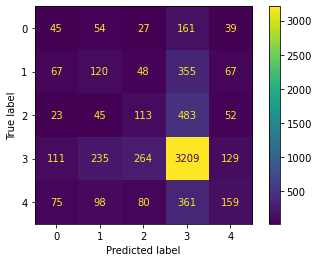

In [31]:
# split X and y from new_input_features before feeding to ANN
new_X_test_pca, new_y_test_pca = new_input_testing_features_fs.drop(['ground_truth'],axis=1), new_input_testing_features_fs['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_pca = model_ensemble_experiment_1['ann'].predict(new_X_test_pca)

# print testing results
print_model_experiment_results('Skenario Uji Coba 2 - Using PCA', new_y_test_pca, predicted_ann_testing_scenario_pca)

## Uji Coba Scenario ann

### Load Data for Scenario ann

In [16]:
X_train_ann = model_ensemble_experiment_ann['data']['training']['X']
y_train_ann = model_ensemble_experiment_ann['data']['training']['y']
X_test_ann = model_ensemble_experiment_ann['data']['testing']['X']
y_test_ann = model_ensemble_experiment_ann['data']['testing']['y']

### Create new input features from stacking ensemble ML before ANN process

In [17]:
new_input_testing_features_ann = create_new_input_features(
    model_ensemble_experiment_ann['stacking_ensembles'], 
    X_test_ann,
    y_test_ann
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA ANN
	Akurasi Score:  0.5674454828660436
	Macro Recall Score:  0.30204757075010014
	Macro Precision Score:  0.32576075892455536
	Macro F1-score Score:  0.30865722062109213
	Macro F2-score Score:  0.30375178689739835
	Macro F0.5-score Score:  0.3172250524194716


              precision    recall  f1-score   support

           0       0.16      0.16      0.16       326
           1       0.21      0.18      0.20       657
           2       0.20      0.15      0.17       716
           3       0.71      0.81      0.75      3948
           4       0.34      0.21      0.26       773

    accuracy                           0.57      6420
   macro avg       0.33      0.30      0.31      6420
weighted avg       0.53      0.57      0.54      6420



<Figure size 1008x576 with 0 Axes>

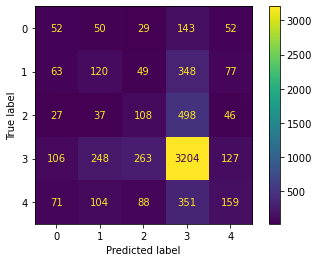

In [18]:
# split X and y from new_input_features before feeding to ANN
new_X_test_ann, new_y_test_ann = new_input_testing_features_ann.drop(['ground_truth'],axis=1), new_input_testing_features_ann['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_ann = model_ensemble_experiment_ann['ann'].predict(new_X_test_ann)

# print testing results
print_model_experiment_results('Skenario Uji Coba ann', new_y_test_ann, predicted_ann_testing_scenario_ann)

## Uji Coba Skenario 4

### Load Data for Scenario 4 from model_ensemble_experiment_4.pkl

In [22]:
X_train_scenario_4 = model_ensemble_experiment_4['data']['training']['X']
y_train_scenario_4 = model_ensemble_experiment_4['data']['training']['y']
X_test_scenario_4 = model_ensemble_experiment_4['data']['testing']['X']
y_test_scenario_4 = model_ensemble_experiment_4['data']['testing']['y']

### Create new input features from stacking ensemble ML before ANN process

In [23]:
new_input_testing_features_scenario_4 = create_new_input_features_scenario_3(
    model_ensemble_experiment_4['stacking_ensembles'], 
    X_test_scenario_4,
    y_test_scenario_4
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


### Feature Selection and Reduction from new input features

In [24]:
X_new_input_features = new_input_testing_features_scenario_4.drop(['ground_truth'], axis=1)
y_new_input_features = new_input_testing_features_scenario_4['ground_truth'].copy()

#### Chi-square

In [25]:
# do feature selection from pre-trained chi-square scaler on new input features
X_test_fs_chi_square = model_ensemble_experiment_4['new_input_feature_selection']['chi-square']['predictor'].transform(X_new_input_features)

#### PCA

In [26]:
# do dimensionality reduction from pre-trained pca scaller on new input features
X_test_pca = model_ensemble_experiment_4['new_input_feature_selection']['pca']['predictor'].transform(X_new_input_features)

### Feed selected new input features into ANN

#### Chi-Square

		HASIl UJI COBA SKENARIO UJI COBA 4 (FEATURE SELECTION IN NEW INPUT FEATURES USING CHI-SQUARE)
	Akurasi Score:  0.5347352024922118
	Macro Recall Score:  0.28656628835158565
	Macro Precision Score:  0.3001383211469059
	Macro F1-score Score:  0.28920186644122153
	Macro F2-score Score:  0.28691862760494924
	Macro F0.5-score Score:  0.2943455459354992


              precision    recall  f1-score   support

           0       0.11      0.11      0.11       326
           1       0.21      0.12      0.15       657
           2       0.17      0.21      0.19       716
           3       0.70      0.76      0.73      3948
           4       0.30      0.24      0.27       773

    accuracy                           0.53      6420
   macro avg       0.30      0.29      0.29      6420
weighted avg       0.51      0.53      0.52      6420



<Figure size 1008x576 with 0 Axes>

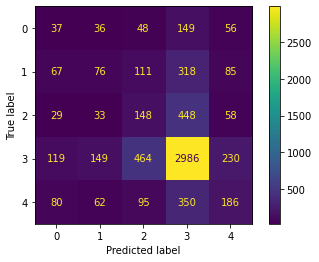

In [27]:
# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_4_chi_square = model_ensemble_experiment_4['new_input_feature_selection']['chi-square']['ann'].predict(X_test_fs_chi_square)

# print testing results
print_model_experiment_results('Skenario Uji Coba 4 (Feature Selection in New Input Features using Chi-Square)', y_new_input_features, predicted_ann_testing_scenario_4_chi_square)

#### PCA

		HASIl UJI COBA SKENARIO UJI COBA 4 (DIMENSIONALITY REDUCTION IN NEW INPUT FEATURES USING PCA)
	Akurasi Score:  0.5811526479750779
	Macro Recall Score:  0.27687117647464277
	Macro Precision Score:  0.3240447433459205
	Macro F1-score Score:  0.284361628442591
	Macro F2-score Score:  0.2776261994431616
	Macro F0.5-score Score:  0.3014955252542042


              precision    recall  f1-score   support

           0       0.16      0.05      0.08       326
           1       0.23      0.18      0.20       657
           2       0.20      0.14      0.16       716
           3       0.68      0.85      0.76      3948
           4       0.35      0.16      0.22       773

    accuracy                           0.58      6420
   macro avg       0.32      0.28      0.28      6420
weighted avg       0.52      0.58      0.54      6420



<Figure size 1008x576 with 0 Axes>

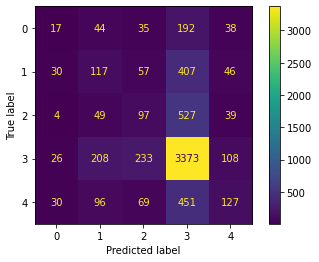

In [28]:
# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_4_pca = model_ensemble_experiment_4['new_input_feature_selection']['pca']['ann'].predict(X_test_pca)

# print testing results
print_model_experiment_results('Skenario Uji Coba 4 (Dimensionality Reduction in New Input Features using PCA)', y_new_input_features, predicted_ann_testing_scenario_4_pca)

## Uji Coba Skenario 5

### Load Data for Scenario 5 from model_ensemble_experiment_5.pkl

In [29]:
X_train_scenario_5 = model_ensemble_experiment_5['data']['training']['X']
y_train_scenario_5 = model_ensemble_experiment_5['data']['training']['y']
X_test_scenario_5 = model_ensemble_experiment_5['data']['testing']['X']
y_test_scenario_5 = model_ensemble_experiment_5['data']['testing']['y']

### Create new input features from stacking ensemble ML for training and testing data

In [30]:
new_input_training_features_scenario_5 = create_new_input_features(
    model_ensemble_experiment_5['stacking_ensembles'], 
    X_train_scenario_5,
    y_train_scenario_5
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


In [31]:
new_input_testing_features_scenario_5 = create_new_input_features(
    model_ensemble_experiment_5['stacking_ensembles'], 
    X_test_scenario_5,
    y_test_scenario_5
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


### Print classification results from single bagging classifiers

In [32]:
X_new_input_training_features = new_input_training_features_scenario_5.drop(['ground_truth'],axis=1)
y_ground_truth_training_features = new_input_training_features_scenario_5['ground_truth'].copy()

X_new_input_testing_features = new_input_testing_features_scenario_5.drop(['ground_truth'],axis=1)
y_ground_truth_testing_features = new_input_testing_features_scenario_5['ground_truth'].copy()

#### New Input feature on Training Data

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_SVM BAGGING VOTING) ON TRAINING DATA
	Akurasi Score:  0.624557655071109
	Macro Recall Score:  0.22087585244894758
	Macro Precision Score:  0.32187605092489163
	Macro F1-score Score:  0.1911125473638108
	Macro F2-score Score:  0.20437273701774167
	Macro F0.5-score Score:  0.19984465669782034


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       761
           1       0.48      0.01      0.02      1532
           2       0.00      0.00      0.00      1670
           3       0.63      0.99      0.77      9210
           4       0.50      0.10      0.17      1804

    accuracy                           0.62     14977
   macro avg       0.32      0.22      0.19     14977
weighted avg       0.50      0.62      0.50     14977



C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

<Figure size 1008x576 with 0 Axes>

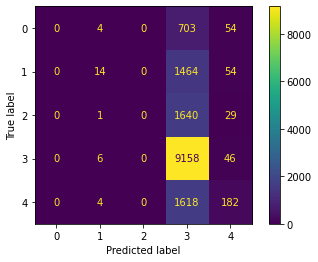

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_LOGREG BAGGING VOTING) ON TRAINING DATA
	Akurasi Score:  0.6256927288509048
	Macro Recall Score:  0.24001352871355386
	Macro Precision Score:  0.3859217587589658
	Macro F1-score Score:  0.22333147265115447
	Macro F2-score Score:  0.2286680680827701
	Macro F0.5-score Score:  0.24266175912961474


              precision    recall  f1-score   support

           0       0.21      0.01      0.03       761
           1       0.34      0.04      0.08      1532
           2       0.33      0.00      0.00      1670
           3       0.64      0.98      0.78      9210
           4       0.41      0.16      0.23      1804

    accuracy                           0.63     14977
   macro avg       0.39      0.24      0.22     14977
weighted avg       0.53      0.63      0.51     14977



<Figure size 1008x576 with 0 Axes>

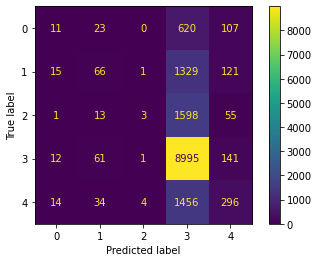

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_NAIVE_BAYES BAGGING VOTING) ON TRAINING DATA
	Akurasi Score:  0.6149429124657808
	Macro Recall Score:  0.2001088327762705
	Macro Precision Score:  0.1730080812128498
	Macro F1-score Score:  0.15258229567257994
	Macro F2-score Score:  0.17789839632159046
	Macro F0.5-score Score:  0.133912759903964


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       761
           1       0.25      0.00      0.00      1532
           2       0.00      0.00      0.00      1670
           3       0.62      1.00      0.76      9210
           4       0.00      0.00      0.00      1804

    accuracy                           0.61     14977
   macro avg       0.17      0.20      0.15     14977
weighted avg       0.40      0.61      0.47     14977



C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

<Figure size 1008x576 with 0 Axes>

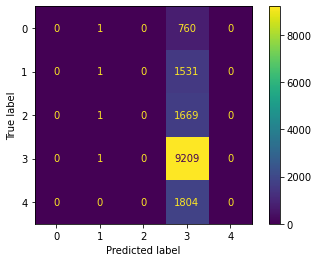

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_DECISION_TREE BAGGING VOTING) ON TRAINING DATA
	Akurasi Score:  1.0
	Macro Recall Score:  1.0
	Macro Precision Score:  1.0
	Macro F1-score Score:  1.0
	Macro F2-score Score:  1.0
	Macro F0.5-score Score:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00      1532
           2       1.00      1.00      1.00      1670
           3       1.00      1.00      1.00      9210
           4       1.00      1.00      1.00      1804

    accuracy                           1.00     14977
   macro avg       1.00      1.00      1.00     14977
weighted avg       1.00      1.00      1.00     14977



<Figure size 1008x576 with 0 Axes>

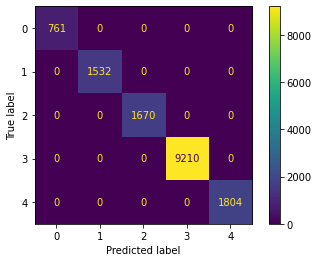

In [33]:
for model in X_new_input_training_features.keys():
    print_model_experiment_results('Skenario Uji Coba 5 ({} Bagging Voting) on Training Data'.format(model), y_ground_truth_training_features, X_new_input_training_features[model])

#### New Input feature on Testing Data

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_SVM BAGGING VOTING) ON TESTING DATA
	Akurasi Score:  0.6244548286604361
	Macro Recall Score:  0.2205176659369897
	Macro Precision Score:  0.3165136732026144
	Macro F1-score Score:  0.19074341924568322
	Macro F2-score Score:  0.20398876559814486
	Macro F0.5-score Score:  0.2001211258567391


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.47      0.01      0.02       657
           2       0.00      0.00      0.00       716
           3       0.63      0.99      0.77      3948
           4       0.48      0.10      0.16       773

    accuracy                           0.62      6420
   macro avg       0.32      0.22      0.19      6420
weighted avg       0.49      0.62      0.50      6420



C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

<Figure size 1008x576 with 0 Axes>

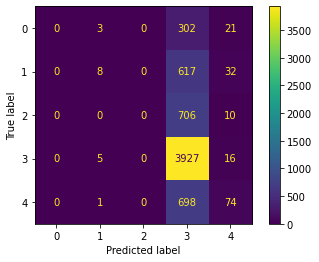

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_LOGREG BAGGING VOTING) ON TESTING DATA
	Akurasi Score:  0.6239875389408099
	Macro Recall Score:  0.23884270665394752
	Macro Precision Score:  0.40803605052175873
	Macro F1-score Score:  0.22221125939662545
	Macro F2-score Score:  0.22757566881352656
	Macro F0.5-score Score:  0.24074224336165811


              precision    recall  f1-score   support

           0       0.14      0.01      0.02       326
           1       0.38      0.06      0.10       657
           2       0.50      0.00      0.00       716
           3       0.64      0.97      0.77      3948
           4       0.38      0.15      0.22       773

    accuracy                           0.62      6420
   macro avg       0.41      0.24      0.22      6420
weighted avg       0.54      0.62      0.51      6420



<Figure size 1008x576 with 0 Axes>

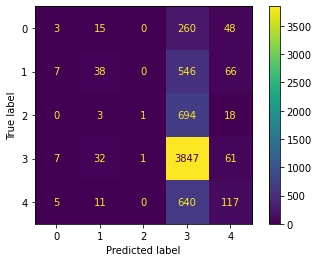

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_NAIVE_BAYES BAGGING VOTING) ON TESTING DATA
	Akurasi Score:  0.6151090342679127
	Macro Recall Score:  0.2005581694447914
	Macro Precision Score:  0.22303615960099749
	Macro F1-score Score:  0.1535452932325383
	Macro F2-score Score:  0.1784886248171474
	Macro F0.5-score Score:  0.13626232608401995


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.50      0.00      0.01       657
           2       0.00      0.00      0.00       716
           3       0.62      1.00      0.76      3948
           4       0.00      0.00      0.00       773

    accuracy                           0.62      6420
   macro avg       0.22      0.20      0.15      6420
weighted avg       0.43      0.62      0.47      6420



C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

<Figure size 1008x576 with 0 Axes>

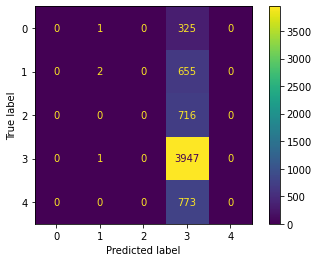

		HASIl UJI COBA SKENARIO UJI COBA 5 (MAJORITY_VOTE_FROM_DECISION_TREE BAGGING VOTING) ON TESTING DATA
	Akurasi Score:  0.571183800623053
	Macro Recall Score:  0.30577894503596076
	Macro Precision Score:  0.3298630980957194
	Macro F1-score Score:  0.3126370018617243
	Macro F2-score Score:  0.3075937245516281
	Macro F0.5-score Score:  0.3213027148082419


              precision    recall  f1-score   support

           0       0.15      0.13      0.14       326
           1       0.24      0.22      0.23       657
           2       0.21      0.15      0.17       716
           3       0.71      0.81      0.76      3948
           4       0.35      0.21      0.26       773

    accuracy                           0.57      6420
   macro avg       0.33      0.31      0.31      6420
weighted avg       0.53      0.57      0.55      6420



<Figure size 1008x576 with 0 Axes>

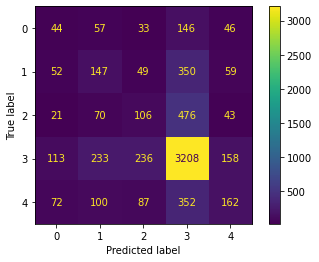

In [34]:
for model in X_new_input_testing_features.keys():
    print_model_experiment_results('Skenario Uji Coba 5 ({} Bagging Voting) on Testing Data'.format(model), y_ground_truth_testing_features, X_new_input_testing_features[model])